In [1]:
from pygam import LogisticGAM, s, f
from pygam.datasets import default
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
CORTE = 0.80

#### Levantamos los datos ya escalados e imputados

In [3]:
dflr = pd.read_csv('fraude_scaled_imputed.tsv', sep='\t')
dflr['Pais'] = [1 if x.lower() == 'ar' else 0 for x in dflr.Pais]
MONTO = dflr.Monto.values
dflr.head(10)

A          B             C         D         E         F         G  \
0 -0.282654   8.368636  50256.521349 -0.097259 -0.282124 -0.160827 -0.087519   
1 -0.282654   8.368636  29013.521349 -0.097259 -0.282124 -0.160827 -0.087519   
2 -0.282654   5.368636     91.521349 -0.097259  0.717876 -0.160827 -0.087519   
3  8.717346  14.368636  50268.521349 -0.097259 -0.282124 -0.160827 -0.087519   
4 -0.282654   6.368636   8179.521349 -0.097259 -0.282124 -0.160827 -0.087519   
5  0.717346  10.368636   1140.521349 -0.097259 -0.282124 -0.160827 -0.087519   
6  9.717346  16.368636   4559.521349 -0.097259 -0.282124 -0.160827 -0.087519   
7 -0.282654   8.368636     37.521349 -0.097259 -0.282124 -0.160827 -0.087519   
8 -0.282654  12.368636   3789.521349 -0.097259 -0.282124 -0.160827 -0.087519   
9 -0.282654  14.368636  23209.521349 -0.097259 -0.282124 -0.160827 -0.087519   

          H         I         L         M         N        O         P  \
0 -0.094709 -0.174688 -0.651261  1.489673 -1.675367 -0.08078  3.501437   
1 -0.094709 -0.174688 -0.651261 -0.510327 -1.675367 -0.08078  1.501437   
2 -0.094709  0.825312 -0.651261  1.489673 -1.675367 -0.08078  0.501437   
3 -0.094709 -0.174688 -0.651261  1.489673 -1.675367 -0.08078  3.501437   
4 -0.094709 -0.174688 -0.651261 -0.510327 -1.675367 -0.08078 -0.498563   
5 -0.094709 -0.174688 -0.651261 -0.510327 -1.675367 -0.08078 -0.498563   
6 -0.094709 -0.174688 -0.651261  1.489673 -1.675367 -0.08078  3.501437   
7 -0.094709 -0.174688 -0.651261 -0.510327 -1.675367  0.91922  3.501437   
8 -0.094709 -0.174688 -0.651261 -0.510327 -1.675367  0.91922  3.501437   
9 -0.094709 -0.174688  0.348739 -0.510327 -1.675367 -0.08078  0.501437   

          Q         R          S      Monto  Pais  Fraude  
0 -0.113563 -0.052192   6.151278   36.92257     0       1  
1 -0.113563 -0.052192  10.561278    7.59257     0       1  
2 -0.113563 -0.052192  85.871278   13.37257     0       1  
3 -0.113563 -0.052192   1.411278   93.08257     0       1  
4 -0.113563 -0.052192  24.861278  134.81257     0       1  
5 -0.113563 -0.052192  30.541278   30.62257     0       1  
6 -0.113563 -0.052192   1.451278   26.40257     0       1  
7 -0.113563 -0.052192  25.621278   82.71257     0       1  
8 -0.113563 -0.052192  42.111278   30.30257     0       1  
9 -0.113563 -0.052192   8.171278   51.46257     0       1

In [4]:
# shuffle the DataFrame rows 
dflr_train = dflr.sample(frac = .7) 
dflr_train.head(10)

A          B              C         D         E         F  \
14120 -0.282654   6.368636     109.521349 -0.097259  3.717876 -0.083827   
5773  -0.282654  15.368636   39234.861333 -0.097259 -0.282124 -0.160827   
411   -0.282654   2.368636   30369.521349 -0.097259  1.717876 -0.143827   
5171  -0.282654  13.368636  183884.521349 -0.097259 -0.282124 -0.160827   
11665 -0.282654   0.368636    5009.521349 -0.097259 -0.282124 -0.160827   
5753  -0.282654   5.368636   39234.861333 -0.097259 -0.282124 -0.160827   
16797 -0.282654   9.368636   67856.521349 -0.097259 -0.282124 -0.160827   
5999   0.717346   0.368636     171.521349 -0.097259 -0.282124 -0.160827   
12785 -0.282654   9.368636   32778.521349 -0.097259 -0.282124 -0.160827   
2551   0.717346   8.368636  342924.521349 -0.097259 -0.282124 -0.160827   

              G         H         I         L         M         N        O  \
14120 -0.087519 -0.094709 -0.174688  0.348739  0.489673 -0.675367 -0.08078   
5773  -0.087519 -0.094709 -0.174688  0.348739 -0.510327 -1.675367 -0.08078   
411   -0.087519 -0.094709  1.825312 -0.651261 -0.510327 -1.675367 -0.08078   
5171  -0.087519 -0.094709 -0.174688 -0.651261 -0.510327 -1.675367 -0.08078   
11665 -0.087519 -0.094709 -0.174688 -0.651261 -0.510327 -1.675367 -0.08078   
5753  -0.087519 -0.094709 -0.174688  0.348739 -0.510327 -1.675367 -0.08078   
16797 -0.087519 -0.094709 -0.174688 -0.651261  0.489673 -1.675367 -0.08078   
5999  -0.087519 -0.094709 -0.174688 -0.651261 -0.510327 -1.675367 -0.08078   
12785 -0.087519 -0.094709 -0.174688  1.348739  0.489673 -1.675367 -0.08078   
2551  -0.087519 -0.094709 -0.174688 -0.651261 -0.510327 -1.675367 -0.08078   

              P         Q         R          S      Monto  Pais  Fraude  
14120  1.501437 -0.113563 -0.052192  19.831278  121.87257     0       0  
5773  -0.498563 -0.113563 -0.052192  10.861278   18.92257     1       0  
411    0.501437 -0.113563 -0.052192  -0.158722   20.61257     0       1  
5171   0.501437 -0.113563 -0.052192  97.601278   94.76257     1       0  
11665 -0.498563 -0.113563 -0.052192  31.661278  142.68257     0       0  
5753  -0.498563 -0.113563 -0.052192  24.581278   17.91257     1       0  
16797  2.501437 -0.113563 -0.052192  82.731278   26.06257     0       1  
5999  -0.498563 -0.113563 -0.052192  22.421278  211.35257     1       0  
12785 -0.498563 -0.113563 -0.052192  15.701278   25.78257     0       0  
2551  -0.498563 -0.113563 -0.052192  11.941278  237.29257     1       1

In [19]:
dflr_test = dflr[~dflr.index.isin(set(dflr_train.index))]
dflr_test

A          B             C         D         E         F  \
1     -0.282654   8.368636  29013.521349 -0.097259 -0.282124 -0.160827   
2     -0.282654   5.368636     91.521349 -0.097259  0.717876 -0.160827   
7     -0.282654   8.368636     37.521349 -0.097259 -0.282124 -0.160827   
9     -0.282654  14.368636  23209.521349 -0.097259 -0.282124 -0.160827   
13    -0.282654  15.368636  10662.521349 -0.097259 -0.282124 -0.160827   
...         ...        ...           ...       ...       ...       ...   
16865 -0.282654   7.368636  46855.521349 -0.097259 -0.282124 -0.160827   
16868  0.717346  13.368636     78.521349 -0.097259  0.717876 -0.157827   
16869 -0.282654   8.368636  14657.521349 -0.097259 -0.282124 -0.160827   
16871  1.717346  13.368636  19936.521349 -0.097259 -0.282124 -0.160827   
16879 -0.282654  10.368636  15127.521349 -0.097259  2.717876 -0.156827   

              G         H         I         L         M         N        O  \
1     -0.087519 -0.094709 -0.174688 -0.651261 -0.510327 -1.675367 -0.08078   
2     -0.087519 -0.094709  0.825312 -0.651261  1.489673 -1.675367 -0.08078   
7     -0.087519 -0.094709 -0.174688 -0.651261 -0.510327 -1.675367  0.91922   
9     -0.087519 -0.094709 -0.174688  0.348739 -0.510327 -1.675367 -0.08078   
13    -0.087519 -0.094709 -0.174688 -0.651261 -0.510327 -1.675367 -0.08078   
...         ...       ...       ...       ...       ...       ...      ...   
16865 -0.087519 -0.094709 -0.174688 -0.651261 -0.510327 -1.675367 -0.08078   
16868 -0.087519 -0.094709  0.825312  2.348739  1.489673 -1.675367 -0.08078   
16869 -0.087519 -0.094709 -0.174688  0.348739 -0.510327 -1.675367 -0.08078   
16871 -0.087519 -0.094709 -0.174688 -0.651261  0.489673 -1.675367 -0.08078   
16879 -0.087519 -0.094709 -0.174688 -0.651261  0.489673 -1.675367 -0.08078   

              P         Q         R          S      Monto  Pais  Fraude  
1      1.501437 -0.113563 -0.052192  10.561278    7.59257     0       1  
2      0.501437 -0.113563 -0.052192  85.871278   13.37257     0       1  
7      3.501437 -0.113563 -0.052192  25.621278   82.71257     0       1  
9      0.501437 -0.113563 -0.052192   8.171278   51.46257     0       1  
13    -0.498563 -0.113563 -0.052192  11.011278   10.73257     0       1  
...         ...       ...       ...        ...        ...   ...     ...  
16865 -0.498563 -0.113563 -0.052192  97.791278   47.27257     0       1  
16868  4.501437 -0.113563 -0.052192  95.601278    9.52257     0       1  
16869  0.501437 -0.113563 -0.052192  92.191278   80.86257     0       1  
16871 -0.498563 -0.113563 -0.052192  64.151278  345.37257     0       1  
16879 -0.498563 -0.113563 -0.052192  85.981278   20.99257     0       1  

[5064 rows x 20 columns]

In [6]:
dflr.shape, dflr.columns

((16880, 20),
 Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'O', 'P',
        'Q', 'R', 'S', 'Monto', 'Pais', 'Fraude'],
       dtype='object'))

#### Separo en conjunto de entrenamiento y test y creo el modelo sobre cada variable

In [7]:
X, y = (dflr_train.drop('Fraude', axis=1).values, dflr_train.Fraude.values)
#lam = np.logspace(-3, 3, 11)
#lams = [lam] * 19
# s significa spline y f significa factor , para categoricas
gam = LogisticGAM(f(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8)
                  + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16)
                  + s(17) + f(18) ).gridsearch(X, y)

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/home/ramon/Documents/deeptrack/cluster_env/pygam_env/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/ramon/Documents/deeptrack/cluster_env/pygam_env/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
  9% (1 of 11) |##                       | Elapsed Time: 0:00:04 ETA:   0:00:46/home/ramon/Documents/deeptrack/cluster_env/pygam_env/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/ramon/Documents/deeptrack/cluster_env/pygam_env/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
 18% (2 of 11) |####                     | Elapsed Time: 0

#### A continuacion, de a grupos, veremos el plot del fit de cada variable segun su funcion en el modelo

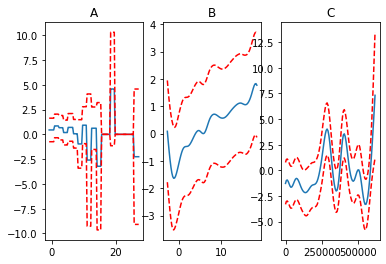

In [9]:
fig, axs = plt.subplots(1, 3)
titles = ['A', 'B', 'C', 'D','E', 'F', 'G', 'H',
          'I', 'L', 'M', 'N', 'O', 'P','Q', 'R', 
          'S', 'Monto', 'Pais']

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    #ax.figure(figsize=(6,7))
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);

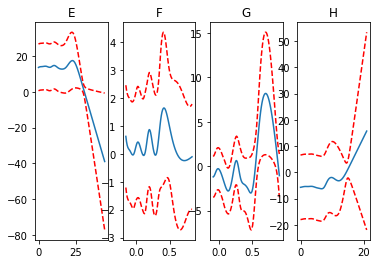

In [10]:
fig, axs = plt.subplots(1, 4)
step = 4
for i, ax in enumerate(axs):
    i += step
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    #ax.figure(figsize=(6,7))
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);

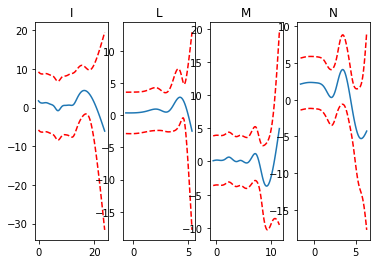

In [11]:
fig, axs = plt.subplots(1, 4)
step = 8
for i, ax in enumerate(axs):
    i += step
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    #ax.figure(figsize=(6,7))
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);

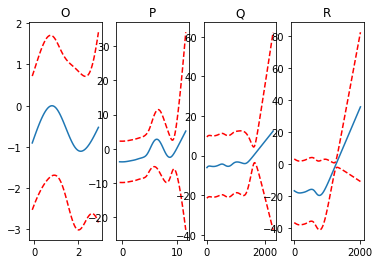

In [117]:
fig, axs = plt.subplots(1, 4)
step = 12
for i, ax in enumerate(axs):
    i += step
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    #ax.figure(figsize=(6,7))
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);

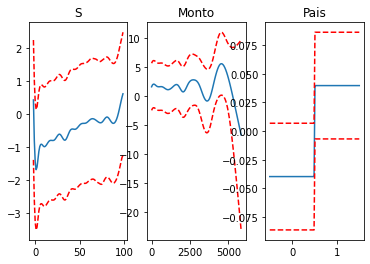

In [12]:
fig, axs = plt.subplots(1, 3)
step = 16
for i, ax in enumerate(axs):
    i += step
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    #ax.figure(figsize=(6,7))
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);

#### Accuracy de cross validation

In [16]:
gam.accuracy(X, y)

0.77708192281652

In [17]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                    168.1193
Link Function:                        LogitLink Log Likelihood:                                 -5663.7882
Number of Samples:                        11816 AIC:                                             11663.815
                                                AICc:                                           11668.7559
                                                UBRE:                                               2.9985
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1825
Feature Function                  Lam

/home/ramon/Documents/deeptrack/cluster_env/pygam_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [14]:
yprob = gam.predict_proba(dflr_test.drop('Fraude', axis=1))
def _loss(monto, y_true, y_pred):
    #global idx2amount
    ganancia = monto * 0.25
    if y_pred == 1 and y_true == 1:
        return 0
    elif y_pred == 0 and y_true == 1:
        return - 100#- monto
    elif y_pred == 0 and y_true == 0:
        return 25#ganancia
    elif y_pred == 1 and y_true == 0:
        return -25#- ganancia


def custom_loss_calc(monto_arr, true_array, pred_array):
    return sum(_loss(i, yp, yt) 
               for i, yp, yt in 
               zip(monto_arr, pred_array, true_array)
              )

#### Ganancia del test

In [ ]:
def denorm(val):
    return round(
        (val * np.std(MONTO)) 
        + np.mean(MONTO), 4
        )

pred = yprob > 0.86#CORTE
ypred = [1 if x == True else 0 for x in pred]

mont_denorm = list(map(lambda x:denorm(x), dflr_test.Monto))
custom_loss_calc(mont_denorm, dflr_test.Fraude.values, ypred)

In [95]:
gam.logs_

defaultdict(list,
            {'deviance': [11330.216898982195,
              11355.257530434817,
              11351.63542262587,
              11351.221337711693,
              11351.168581034512,
              11351.155079305785,
              11351.153095865768],
             'accuracy': [0.7736008805350943,
              0.7737238635401676,
              0.773808516041649,
              0.773808516041649,
              0.773808516041649,
              0.773808516041649,
              0.773808516041649],
             'diffs': [0.623827094787439,
              0.07009579087929683,
              0.05088883061159067,
              0.043635942185012086,
              0.020354563136691414,
              0.0029716290751153848,
              5.410665627921328e-05]})

#### Curva de la ganancia en funcion del corte, y los scores de ganancia 

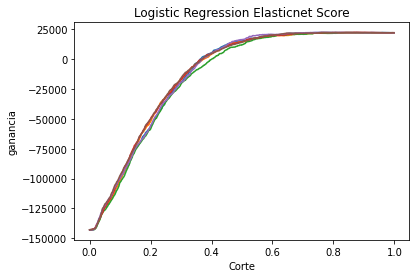

22400
21950
21925
22425
22450
22350


<Figure size 432x288 with 0 Axes>

In [20]:
score_gan_0 = []
score_gan_1 = []
score_gan_2 = []
score_gan_3 = []
score_gan_4 = []
score_gan_5 = []
score_auc_3 = []
ganancia_dic = {}
ganancia_dic = {}

for f in range(0, 6):
    ganancia_dic['score_gan_{}'.format(f)] = []
    for i in np.arange(0, 1, 0.001):

        #pred = ppc['out'].mean(axis=0) > i
        ypred = [1 if x > i else 0 for x in results_stored[f]['y_prob'][0]]
        ganancia_dic['score_gan_{}'.format(f)].append(custom_loss_calc(y_test.index, results_stored[f]['y_test'][0], ypred))
        
plt.plot(np.arange(0, 1, 0.001), ganancia_dic['score_gan_0'])
plt.plot(np.arange(0, 1, 0.001), ganancia_dic['score_gan_1'])
plt.plot(np.arange(0, 1, 0.001), ganancia_dic['score_gan_2'])  # < -- up
plt.plot(np.arange(0, 1, 0.001), ganancia_dic['score_gan_3'])
plt.plot(np.arange(0, 1, 0.001), ganancia_dic['score_gan_4'])
plt.plot(np.arange(0, 1, 0.001), ganancia_dic['score_gan_5'])

plt.title('Logistic Regression Elasticnet Score')
plt.xlabel('Corte')
plt.ylabel('ganancia')
plt.show()
plt.savefig('Logistic Regression Score Ganancia')        

lr_8 = []
for f in range(0, 6):
    #knn_8['score_gan_{}'.format(f)] = []
    ypred = [1 if x > 0.8 else 0 for x in results_stored[f]['y_prob'][0]]
    print(custom_loss_calc(results_stored[f]['y_test'][0].index, results_stored[f]['y_test'][0], ypred))
    lr_8.append(custom_loss_calc(results_stored[f]['y_test'][0].index, results_stored[f]['y_test'][0], ypred))

#### Ganancia del test

In [21]:
lr_8_test = []
y_prob_test = gam.predict(X_test)
ypred_test = [1 if x > 0.8 else 0 for x in y_prob_test]
print(custom_loss_calc(y_test.index, y_test, ypred_test))
lr_8_test.append(custom_loss_calc(y_test.index, y_test, ypred_test))

37850


#### Accuracy del test

In [23]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, ypred_test), 4)

0.7609